In [1]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vivekkumar110802
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|█████████████████████████████████████████████████████████████████████████████| 2.29G/2.29G [21:38<00:00, 1.90MB/s]


In [3]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [5]:
directory ='./chest-xray-pneumonia/chest_xray/train'

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [6]:
df_train

,filepath,label
0,./chest-xray-pneumonia/chest_xray/train\NORMAL...,NORMAL
1,./chest-xray-pneumonia/chest_xray/train\NORMAL...,NORMAL
2,./chest-xray-pneumonia/chest_xray/train\NORMAL...,NORMAL
3,./chest-xray-pneumonia/chest_xray/train\NORMAL...,NORMAL
4,./chest-xray-pneumonia/chest_xray/train\NORMAL...,NORMAL
...,...,...
5211,./chest-xray-pneumonia/chest_xray/train\PNEUMO...,PNEUMONIA
5212,./chest-xray-pneumonia/chest_xray/train\PNEUMO...,PNEUMONIA
5213,./chest-xray-pneumonia/chest_xray/train\PNEUMO...,PNEUMONIA
5214,./chest-xray-pneumonia/chest_xray/train\PNEUMO...,PNEUMONIA


In [8]:
directory ='./chest-xray-pneumonia/chest_xray/test'

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test= pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [9]:
df_test.sample()

,filepath,label
45,./chest-xray-pneumonia/chest_xray/test\NORMAL\...,NORMAL


In [10]:
df_train.shape

(5216, 2)

In [11]:
df_test.shape

(624, 2)

In [30]:
data_dir ='./chest-xray-pneumonia/chest_xray/train'
test_dir ='./chest-xray-pneumonia/chest_xray/test/'

IMAGE_SIZE = (256,256)

print('Training Images:')
# Creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing  Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Validation Images:
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


In [14]:
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

class_labels = ['NORMAL', 'PNEUMONIA']

label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
train_labels_encoded = label_encoder.transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [16]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


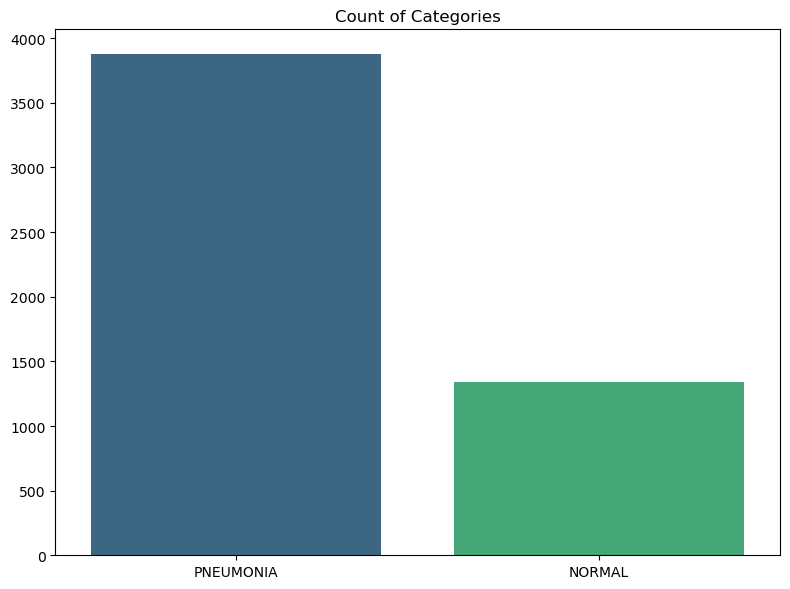

In [17]:
count = df_train['label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=count.index, y=count.values, palette="viridis")
plt.title('Count of Categories')
plt.tight_layout()
plt.show()

In [18]:
def visualize_images(path, num_images=5):
    image_filenames = os.listdir(path)
    num_images = min(num_images, len(image_filenames))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')
    for i, image_filename in enumerate(image_filenames[:num_images]):
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)

    plt.tight_layout()
    plt.show()

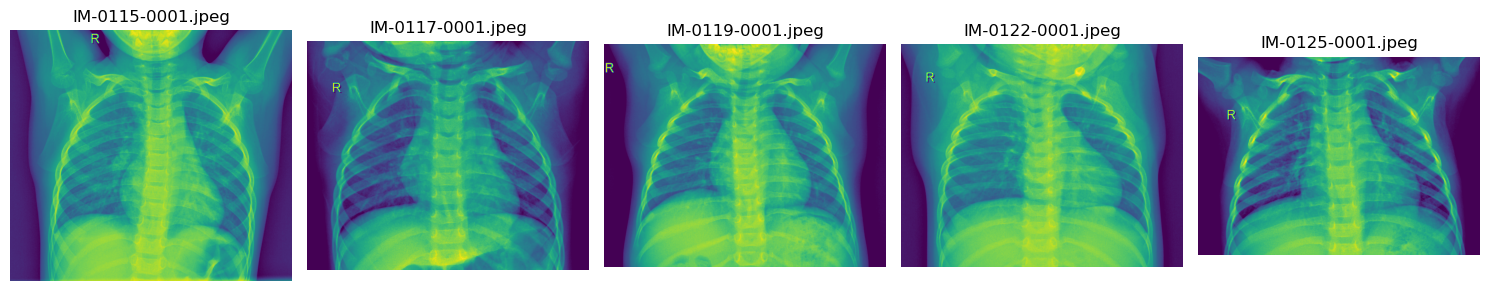

In [20]:
path_to_visualize =   './chest-xray-pneumonia/chest_xray/train/NORMAL'

visualize_images(path_to_visualize, num_images=5)

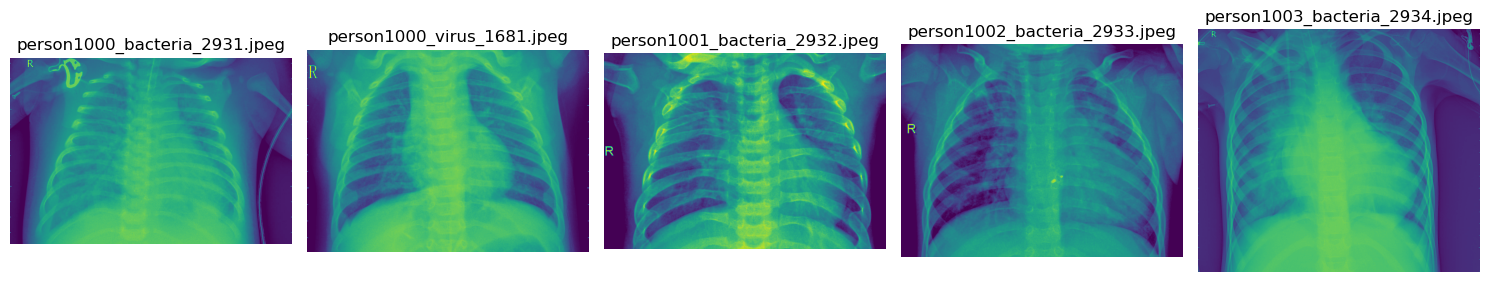

In [21]:
path_to_visualize = './chest-xray-pneumonia/chest_xray/train/PNEUMONIA'

visualize_images(path_to_visualize, num_images=5)

In [22]:
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))
base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_ds,
                        epochs= 50,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/50
147/147 [==============================] - 374s 3s/step - loss: 0.2167 - accuracy: 0.9110 - val_loss: 0.3684 - val_accuracy: 0.8292
Epoch 2/50
147/147 [==============================] - 393s 3s/step - loss: 0.1598 - accuracy: 0.9382 - val_loss: 0.2393 - val_accuracy: 0.9635
Epoch 3/50
147/147 [==============================] - 421s 3s/step - loss: 0.1353 - accuracy: 0.9476 - val_loss: 0.1317 - val_accuracy: 0.9712
Epoch 4/50
147/147 [==============================] - 438s 3s/step - loss: 0.1312 - accuracy: 0.9489 - val_loss: 0.0876 - val_accuracy: 0.9731
Epoch 5/50
147/147 [==============================] - 435s 3s/step - loss: 0.1275 - accuracy: 0.9553 - val_loss: 0.0681 - val_accuracy: 0.9731
Epoch 6/50
147/147 [==============================] - 439s 3s/step - loss: 0.1169 - accuracy: 0.9561 - val_loss: 0.0640 - val_accuracy: 0.9750
Epoch 7/50
147/147 [==============================] - 440s 3s/step - loss: 0.1128 - accuracy: 0.9587 - val_loss: 0.0640 - val_accuracy: 0.9731

In [24]:
validation_loss, validation_accuracy = model.evaluate(validation_ds)
validation_loss

17/17 [==============================] - 39s 2s/step - loss: 0.0462 - accuracy: 0.9808


0.04623532295227051

In [25]:
validation_accuracy

0.9808061122894287

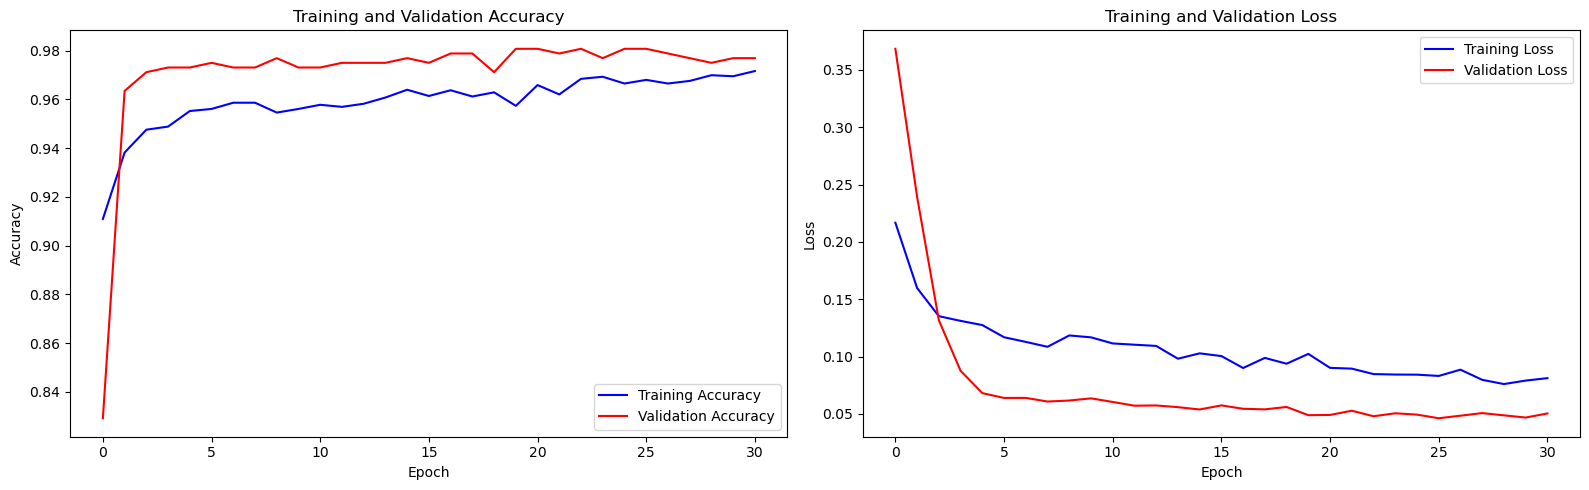

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [31]:
def plot_images_with_predictions(model, dataset, class_labels, num_images=40, num_images_per_row=5):
    predictions = model.predict(dataset)
    dataset_shuffled = dataset.shuffle(buffer_size=len(dataset))
    plt.figure(figsize=(15, 10))
    for i, (images, labels) in enumerate(dataset_shuffled.take(num_images)):
      images = images.numpy()
      for j in range(len(images)):
            if i * num_images_per_row + j < num_images:
                predicted_class = class_labels[np.argmax(predictions[i * num_images_per_row + j])]
                true_class = class_labels[np.argmax(labels[j])]

                plt.subplot(num_images // num_images_per_row + 1, num_images_per_row, i * num_images_per_row + j + 1)
                plt.imshow(images[j].astype("uint8"))
                plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()

20/20 [==============================] - 39s 2s/step


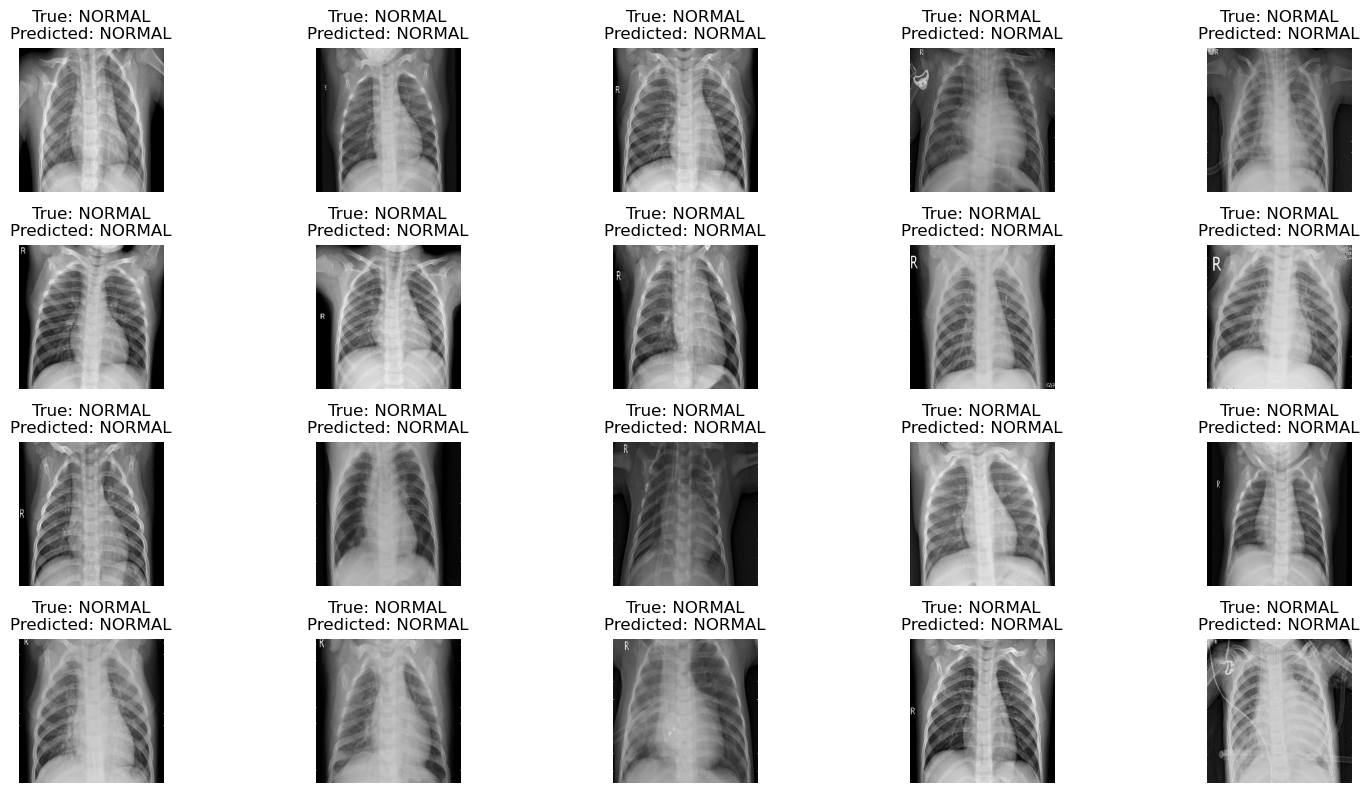

In [32]:
plot_images_with_predictions(model, test_ds, class_labels, num_images=20)